In [1]:
import pandas as pd
df = pd.read_pickle('tweets_sentiment_location.pkl')

In [66]:
df.head()

,Unnamed: 0,Date,Location,User,Tweet,Sentiment,Sentiment Score,Latitude,Longitude
0,0,2022-04-26,NaN,StevenGWalker74,"Paul Adams, the BBC's diplomatic correspondent...",NEGATIVE,0.758317,NaN,NaN
1,1,2022-04-26,"London, UK",SkyNews,UK has imported £220 million of Russian oil si...,NEGATIVE,0.625810,51.507322,-0.127647
2,2,2022-04-26,Canada,kolga,Canada will make Russian oligarchs pay for the...,POSITIVE,0.987278,61.066692,-107.991707
3,3,2022-04-26,America!!! Other places suck!,ExceptionalInn1,@sahouraxo Where in Ukraine is Damascus locate...,NEGATIVE,0.995210,NaN,NaN
4,4,2022-04-26,Canada,CBCNews,The world's top nuclear monitor warned that wh...,NEGATIVE,0.788329,61.066692,-107.991707


<AxesSubplot:xlabel='Date', ylabel='Density'>

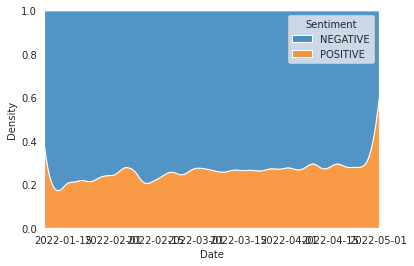

In [67]:
import seaborn as sns
sns.set_style("dark")
sns.kdeplot(data=df, x="Date", hue='Sentiment', multiple="fill")

In [19]:
df2 = df.copy()
df2['date'] = df2.Date.apply(lambda x: x.date()).apply(str)
df2 = df2.groupby(["date", "Latitude", "Longitude", "Sentiment"]).agg({"Tweet":"count"}).reset_index()
df2

,date,Latitude,Longitude,Sentiment,Tweet
0,2022-01-14,-24.776109,134.755000,NEGATIVE,1
1,2022-01-14,19.593801,-155.428370,POSITIVE,1
2,2022-01-14,22.296051,114.271866,NEGATIVE,1
3,2022-01-14,25.285633,51.526416,NEGATIVE,1
4,2022-01-14,27.756767,-81.463983,NEGATIVE,1
...,...,...,...,...,...
29394,2022-04-26,61.066692,-107.991707,POSITIVE,4
29395,2022-04-26,63.246778,25.920916,NEGATIVE,3
29396,2022-04-26,63.246778,25.920916,POSITIVE,2
29397,2022-04-26,64.686314,97.745306,NEGATIVE,1


In [24]:
import plotly.express as px
fig = px.scatter_geo(df2, lat="Latitude", lon="Longitude", color="Sentiment", animation_frame="date", opacity=1)
fig.show()